<h1>Anaemic Classifier</h1>

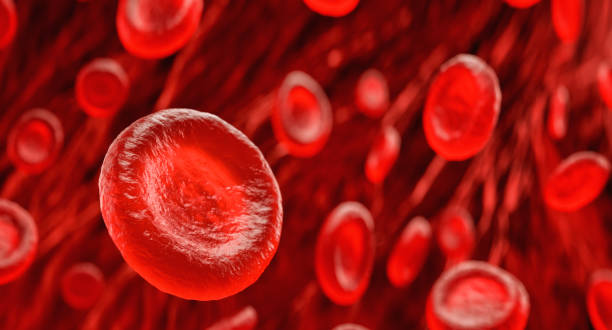

Credits: Pixelimage

<h2>Introduction</h2>

This Jupyter notebook is designed for practice, focusing on building a simple linear regression model to predict the likelihood of patients having anemia based on specific criteria. The following libraries are used: <strong>pandas</strong>, <strong>matplotlib</strong>, <strong>numpy</strong>, <strong>seaborn</strong> and <strong>sklearn</strong>. The data was retrieved from Kaggle, uploaded by Humair M.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

The original data set contains the following factors that affect the likehood of patients having anaemia:
Sex, the percentages of red, blue and green pixels present in images associated with anaemia, and hemoglobin. The outcome of the model results in a categorical "Yes" or "No", as can be seen below.


In [ ]:
df = pd.read_csv("file_.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True) 
X = df[['Sex','%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df[['Anaemic']]
df.sample(3)

NameError: name 'pd' is not defined

In [10]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,44.913580,29.349720,25.570440,10.893100
std,144.481833,2.950017,1.844623,2.215913,3.040943
min,1.000000,36.800000,24.150000,17.950000,4.000000
25%,125.750000,43.000000,28.130000,24.550000,8.920000
50%,250.500000,44.555000,29.480000,25.935000,9.950000
75%,375.250000,46.465000,30.692500,27.002500,13.330000
max,500.000000,56.850000,33.600000,31.300000,18.550000


<h2>Scaling data and training our model</h2>

We encode the data for the parameters "Sex" and "Anaemic" to be binary.

In [21]:
le_anaemic = LabelEncoder()
y_encoded = le_anaemic.fit_transform(y.values.ravel())
le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex']) 

/var/folders/br/1vm80_fj2plgdhm7v40p8qjw0000gn/T/ipykernel_1448/33756502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le_sex.fit_transform(X['Sex'])


We scale the data to ensure that all features contribute proportionally to the model's decision-making process. By normalizing the feature values, we prevent features with larger numeric ranges from disproportionately influencing the model's predictions, reducing potential bias and improving the model’s ability to generalize.

In [34]:
scaler = StandardScaler()
X[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']] = scaler.fit_transform(X[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']])

/var/folders/br/1vm80_fj2plgdhm7v40p8qjw0000gn/T/ipykernel_1448/3468920677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']] = scaler.fit_transform(X[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']])


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.3, random_state=42)
logreg = LogisticRegression(C=0.01, random_state=16)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

<h2>Evaluating the performance</h2>

In this section of the notebook we evaluate the performance of our model. We illustrate the confusion matrix  as well as the evaluation metrics. The heatmap highlights the accuracy of predictions by showing the distribution of true positives, true negatives, false positives, and false negatives. The evaluation metrics summarize accuracy, precision, recall, and F1-score, providing a detailed overview of the model's effectiveness in predicting anemia in patients.

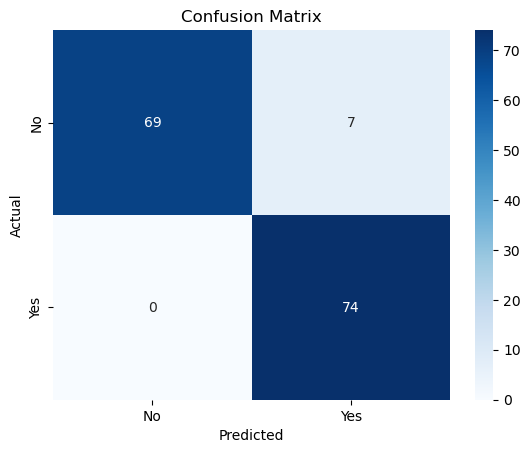

              precision    recall  f1-score   support

          No       1.00      0.91      0.95        76
         Yes       0.91      1.00      0.95        74

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
target = le_anaemic.inverse_transform([0, 1])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

target = le_anaemic.inverse_transform([0,1])
print(metrics.classification_report(y_test, y_pred, target_names = target))

From this data, we obtain the following observations:
> - The model made no false positive predictions
> - The model correctly identified 91% of the actual "No" cases
> - The model correctly predicted 91% of actual "Yes" cases, however had some false positives
> - The model identified the actual "Yes" cases without missing any
>
<strong>The overall metrics suggest that: </strong>
The model demonstrates excellent performance, with very high precision and recall for both classes. The F1-scores of 0.95 for both "No" and "Yes" indicate a balanced and effective model. The slight difference between precision and recall for the "Yes" class suggests the model made a few more false positive predictions, but overall, it is highly accurate.

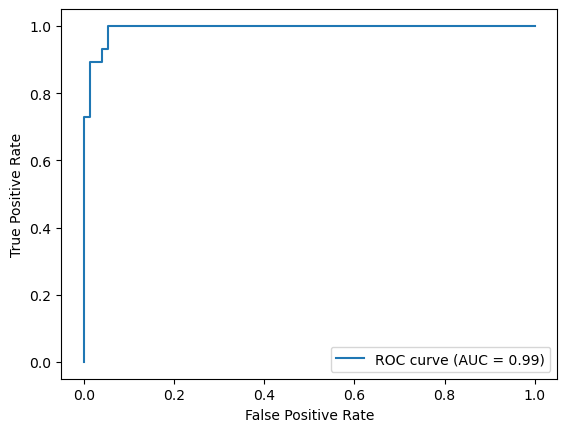

In [31]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The plot above represents the ROC curve for the model, which evaluates the trade-off between the true positive rate and false positive rate across different threshold values.

>The graph suggests that the model is highly effective at correctly identifying patients with anemia while making very few mistakes in predicting false positives.
>
>The AUC score is 0.99, which is very close to 1.0. This indicates that the model performs exceptionally well in distinguishing between the two classes (patients with and without anemia), with a very high degree of accuracy.

<h2>Conclusion</h2>

In this report, we developed a binary classification model to predict the presence of anemia in patients. The model demonstrated outstanding performance, achieving an AUC score of 0.99, which suggests that it is highly effective at distinguishing between patients with and without anemia. Moreover, the evaluation metrics, including accuracy (0.95), precision, recall, and F1-scores for both classes, further indicate the model’s strong predictive capabilities.

<strong>Despite the impressive performance metrics, it is important to consider the potential weaknesses and sources of bias in the model that may have contributed to such high scores:</strong>

> - The high AUC and accuracy might indicate that the model is overfitting to the training data
> - Some features that were highly correlated with the target variable (anemia) were included in the model (hemoglobin present in blood) which could lead to artificially inflated performance. 
> - The dataset provided only a limited amount of patients' data, which could explain the overall successful performance

To address these concerns, future work should focus on implementing techniques like cross-validation, regularization, and carefully curating the dataset to minimize bias and ensure robust, reliable predictions. By mitigating these potential issues, the model can be fine-tuned to perform even more effectively in real-world clinical settings.

In conclusion, while the model shows great potential for predicting anemia, additional steps are required to validate and enhance its robustness before it can be confidently applied in practice.